#### There are two semi circles of width thk with inner radius rad, separated by sep as shown (red is -1 and blue is + 1 ). The center of the top semi circle is aligned with the middle of the edge of the bottom semi circle. This task is linearly separable when sep 2: 0, and not so for sep < 0 . Set rad = 10, thk = 5 an d sep = 5 . Then, generate 2,000 examples uniformly, which means you will have approximately 1,000 examples for each class.

In [24]:
import numpy as np

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

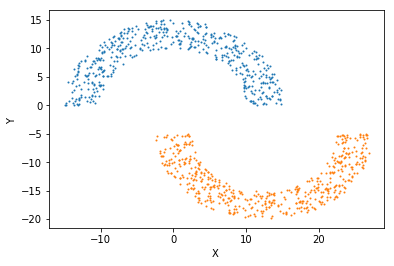

In [25]:
import matplotlib.pyplot as plt
top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]


plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.xlabel('X ')
plt.ylabel('Y ')

plt.show()

#### 3.1(a)Run the PLA starting from w = 0 until it converges. Plot the data and the final hypothesis.

PLA took 8 iterations to converge
z = [ 8.          0.7232979  18.98348285]
slope = -0.038101432874856164
intercept = -0.42141898117929333


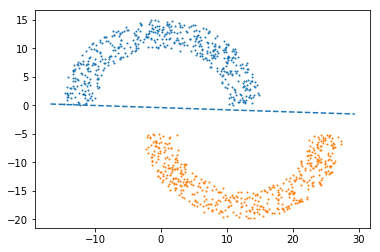

In [26]:
import numpy as np
import matplotlib.pyplot as plt

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]


plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)

# pre-processing the data for (a)
x1 = [[1] + i + [1] for i in top]
x2 = [[1] + i + [-1] for i in bottom]
data = x1 + x2

X = []
Y = []

for i in range(1000):
    Y.append(data[i][3])
#print(Y)

for i in range(1000):
    X.append(data[i][:3])
    

def Perceptron(X, Y):

    weights = np.array([0,0,0])

    epoch = 200
    iteration = 0
    
    for k in range(epoch):
        for i, n in enumerate(X):

            predicted_y =  np.sign(np.dot(X[i] ,(np.transpose(weights))))

            actual_y = Y[i]

            if predicted_y == actual_y:
                weights = weights
            else:
                iteration = iteration + 1
                weights = weights + (X[i] * Y[i])
                   
    print("PLA took " + str(iteration) + " iterations to converge")
    return weights
 

z = Perceptron(X,Y)

w0 = z[0]
w1 = z[1]
w2 = z[2]

slope = -w1/w2
intercept = -w0/w2

print("z =", z)
print("slope =",slope)
print("intercept =",intercept)

# Plot a line from slope and intercept
def abline(slope, intercept):
     
     ax = plt.gca()
     x_value = np.array(ax.get_xlim())
     y_value = intercept + slope * x_value
     plt.plot(x_value, y_value, '--')
        
abline(slope,intercept)         

plt.show()

#### 3.1(b) Repeat part (a) using the linear regression (for classification) to obtain w. Explain your observations.

X: (1000, 3)
X_trans (3, 1000)
z = [ 0.23270258 -0.00978364  0.07728953]
slope = 0.12658433578813716
intercept = -3.0107906064142487


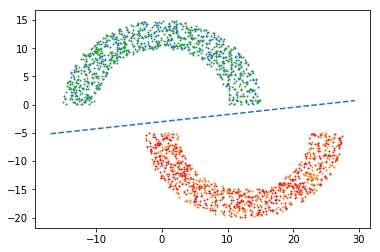

In [27]:
import numpy as np
import matplotlib.pyplot as plt

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]


plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)

# pre-processing the data for (a)
x1 = [[1] + i + [1] for i in top]
x2 = [[1] + i + [-1] for i in bottom]
data = x1 + x2

X = []
Y = []

for i in range(1000):
    Y.append(data[i][3])
#print(Y)

for i in range(1000):
    X.append(data[i][:3])


def linear_reg(X,Y):
    
    print("X:",np.shape(X))
    
    X_trans = np.transpose(X)
    print("X_trans",np.shape(X_trans))
    
    X_1 = (np.matmul(X_trans,X)) 
    X_inverse = np.linalg.inv(X_1)
    #print("X_inverse:",np.shape(X_inverse))
    
    X_pseudoinverse = np.matmul(X_inverse,X_trans)
    #print("X_pseudoinverse",np.shape(X_pseudoinverse))
    #print("Y:",np.shape(Y))
    
    w_lin = np.matmul(X_pseudoinverse, Y )
    #print("w_lin",np.shape(w_lin))   
    return (w_lin)
    
z = linear_reg(X,Y)



w0 = z[0]
w1 = z[1]
w2 = z[2]

slope = -w1/w2
intercept = -w0/w2

print("z =", z)
print("slope =",slope)
print("intercept =",intercept)


def abline(slope, intercept):
     # Plot a line from slope and intercept
     ax = plt.gca()
     x_value = np.array(ax.get_xlim())
     y_value = intercept + slope * x_value
     plt.plot(x_value, y_value, '--')
        
abline(slope,intercept)         


top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]


plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)

#plt.plot(slope,'bx')
#plt.plot(intercept,'rx')


plt.show()


